In [2]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import os
from matplotlib.colors import from_levels_and_colors
from distinctipy import distinctipy
import time
from optimize import OptimizerClass

In [10]:
a1 = np.array([[1, 2, 3, 4, 5],
               [6, 7, 8, 9, 0],
               [1, 2, 3, 4, 5],
               [6, 7, 8, 9, 0],
               [6, 7, 8, 9, 0]])
test = a1[1:4, 1:4]

In [16]:
sig.correlate2d(test, a1)

array([[  0,  63, 128, 194, 170, 111,  54],
       [  0,  81, 171, 268, 235, 157,  78],
       [ 35, 149, 269, 342, 285, 183,  87],
       [ 10, 149, 294, 417, 360, 233, 112],
       [ 70, 154, 239, 222, 165,  98,  42],
       [ 10,  86, 166, 223, 190, 122,  58],
       [ 35,  68,  98,  74,  50,  26,   9]])

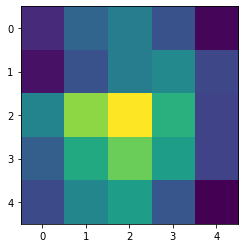

In [26]:
plt.imshow(sig.correlate2d(a1, test, mode='same'))

In [31]:
def CreateMask(mask_size, fill_frac):
    """
    Creation of the first mask for the "optimization" process
    """
    mask = np.ones(mask_size**2)
    num_fill = math.ceil(fill_frac * (mask_size**2))

    mask[np.random.choice(mask.size, num_fill, replace=False)] = 0
    
    mask = mask.reshape(mask_size, mask_size)
    
    return mask

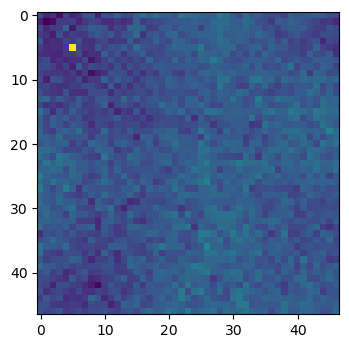

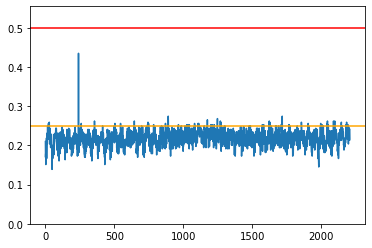

In [202]:
size = 64
test_mask = CreateMask(size, 0.5)
samp_size = 18
offset = 5
test_mask_pad = np.pad(test_mask, samp_size, 'constant', constant_values=0)

# test_sample = test_mask_pad[samp_size-offset:2*samp_size-offset, samp_size-offset:2*samp_size-offset]
test_sample = test_mask[offset:offset+samp_size, offset:offset+samp_size]

plt.figure(dpi=100)
plt.imshow(sig.correlate2d(test_mask, test_sample, mode='valid'))
plt.show()

temp = (sig.correlate2d(test_mask, test_sample, mode='valid')/(test_sample.size))
plt.plot(temp.reshape(temp.size, ))
plt.axhline(fill_frac, color='red')
plt.axhline(fill_frac**2, color='orange')
plt.ylim(0, 1.11*fill_frac)
plt.show()

In [181]:
test_mask.shape

(100, 100)

In [182]:
test_sample.shape

(10, 10)

In [180]:
temp.shape

(91, 91)

In [115]:
fill_frac = 0.5
mask_size = 10

In [121]:
ideal = np.ones((mask_size, mask_size))*(fill_frac**2)
np.fill_diagonal(ideal, fill_frac)

In [144]:
ideal

array([[0.5 , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.5 , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.5 , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.5 , 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.5 , 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.25],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 ]])

In [171]:
%timeit (sig.correlate2d(test_mask, test_sample, mode='valid')/(test_sample.size)).reshape(test_mask.size, )

670 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [151]:
test_mask.size

4096

In [191]:
test_mask

array([[0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.]])

In [192]:
np.random.choice(np.where(test_mask > 0)[0])

34

In [193]:
test_mask[34]

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0.])

In [233]:
temdd = np.array([(sig.correlate2d(test_mask, test_mask[m:m+samp_size, n:n+samp_size], mode='valid')/(47**2)).reshape(47**2, ) for m in range(0, size-samp_size+1) for n in range(0, size-samp_size+1)])

In [222]:
sig.correlate2d(test_mask, test_mask[0:0+samp_size, 0:0+samp_size]).shape[0]

81

In [234]:
temdd.shape

(2209, 2209)

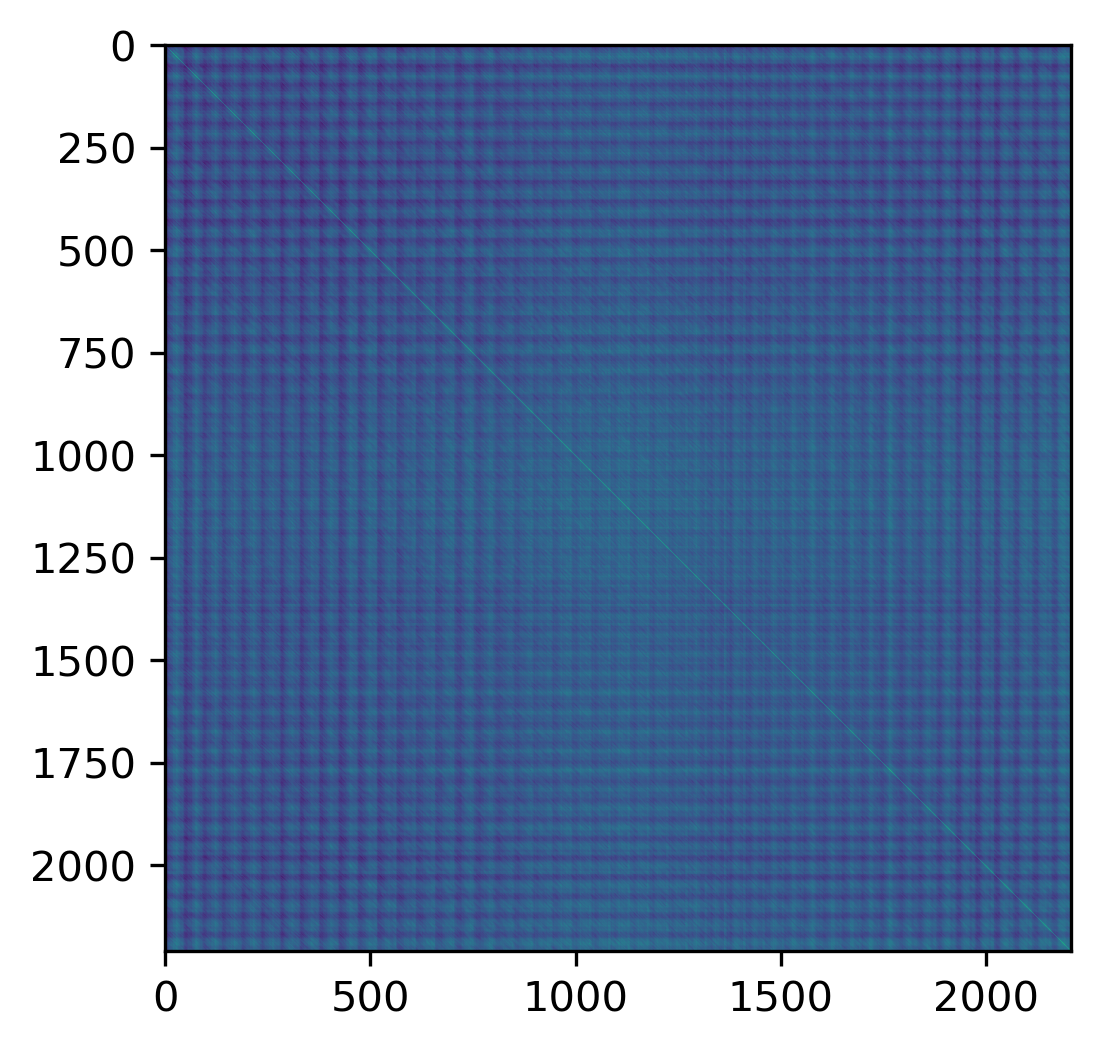

In [236]:
plt.figure(dpi=300)
plt.imshow(temdd)

In [2]:
# final_data = np.load("Optimizations/GD_ms_64-ff_5-mag_2-seed_2/data_35000-37499.npy", allow_pickle=True).item()

In [40]:
final_data, files_list = {}, []
data_dir = 'Optimizations/GD_ms_64-ff_5-mag_2-seed_2/'
for f in os.listdir(data_dir):
    if f.endswith('.npy') and not f.endswith('data.npy'):
        files_list.append([int(f.split('_')[1].split('-')[0]), f])
files_list.sort()

for i, fd in enumerate(files_list):
    files_list[i] = np.load(data_dir+fd[1], allow_pickle=True).item()

for key in files_list[0]:
    final_data[key] = np.concatenate(list(d[key] for d in files_list))
del files_list

print('Water level is currently at: {}'.format(final_data['Water Levels'][-1]))
print('Best metric so far at: {}, {} iterations in'.format(
    min(final_data['Metrics']), final_data['Iterations'][np.argmin(final_data['Metrics'])]))

print('Longest in a row without improvement: {}'.format(max(final_data['Stopping Iterations'])))

Water level is currently at: 0.5390776948242816
Best metric so far at: 0.5383925875745208, 69971 iterations in
Longest in a row without improvement: 35


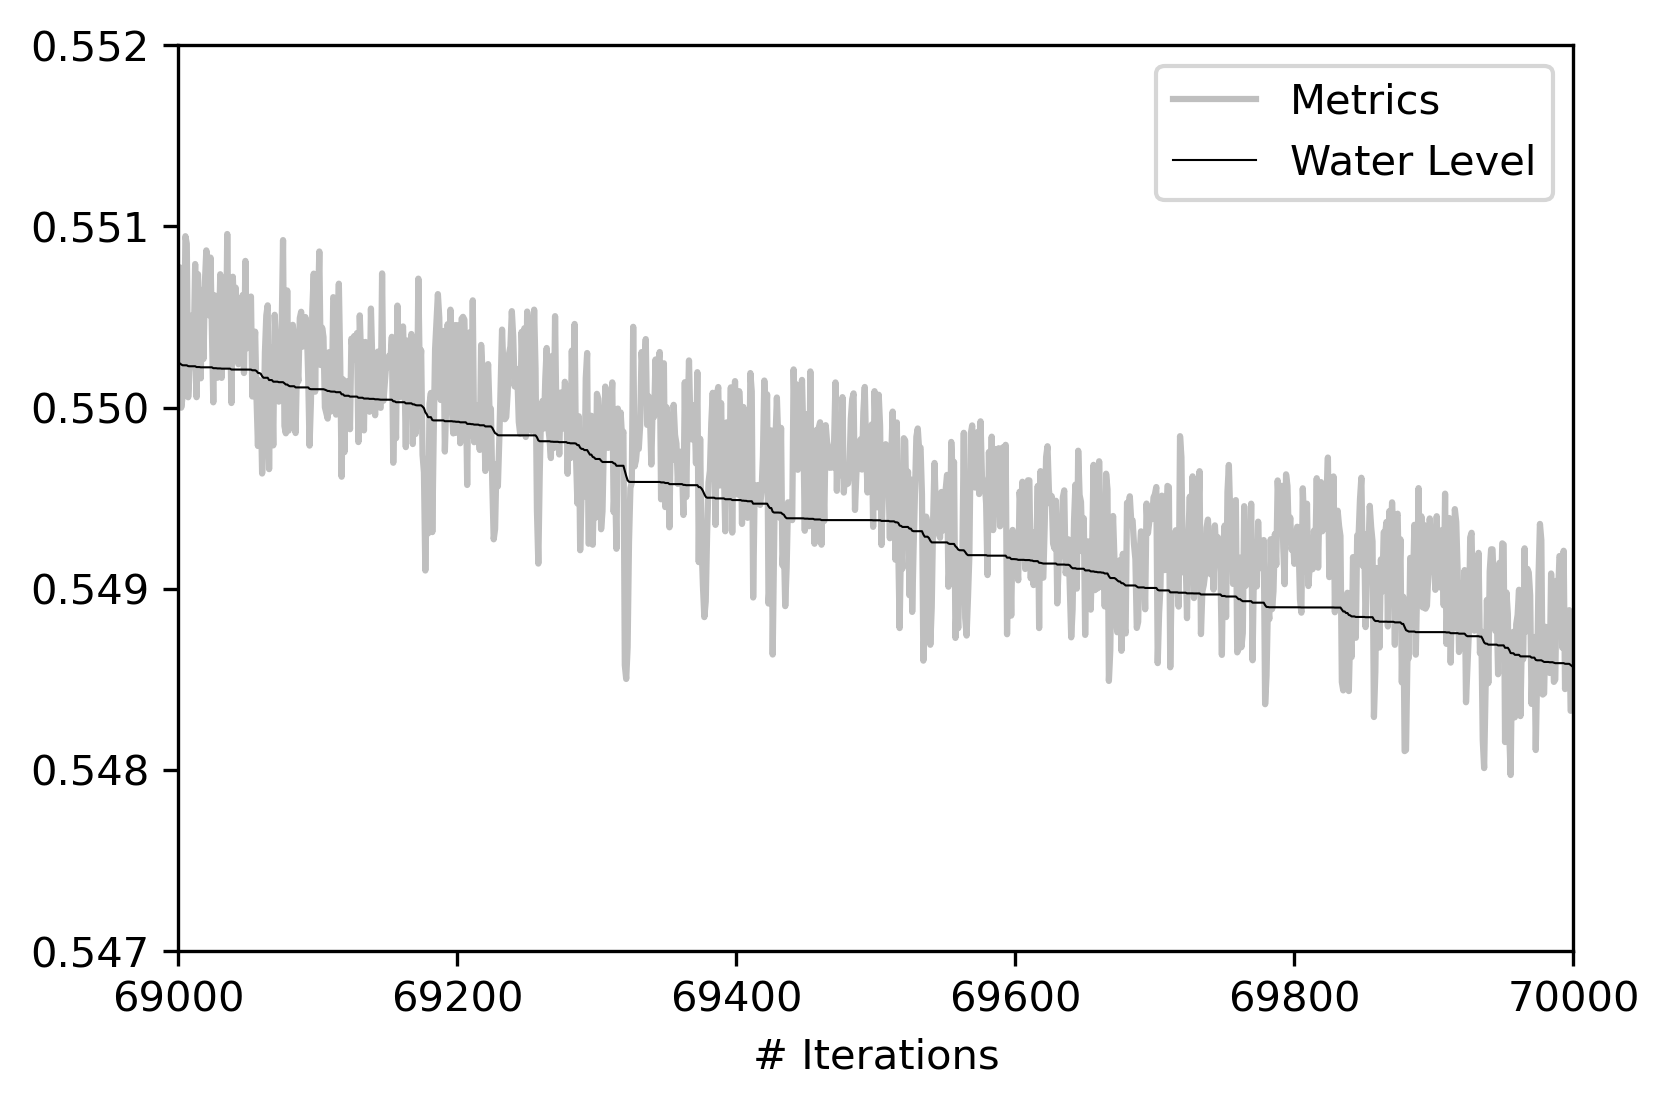

In [17]:
plt.figure(dpi=300)
plt.plot(final_data['Iterations'], final_data['Metrics'], label='Metrics', alpha=0.5, color='grey')
plt.plot(final_data['Iterations'], final_data['Water Levels'], label='Water Level', linewidth=0.5, color='black')
plt.legend()
plt.xlabel('# Iterations')
plt.savefig(data_dir+'Plots/Water_Level_Evolution_test.png', 
            bbox_inches='tight', facecolor='white')
plt.xlim(69000,70000)
plt.ylim(0.547,0.552)
plt.show()

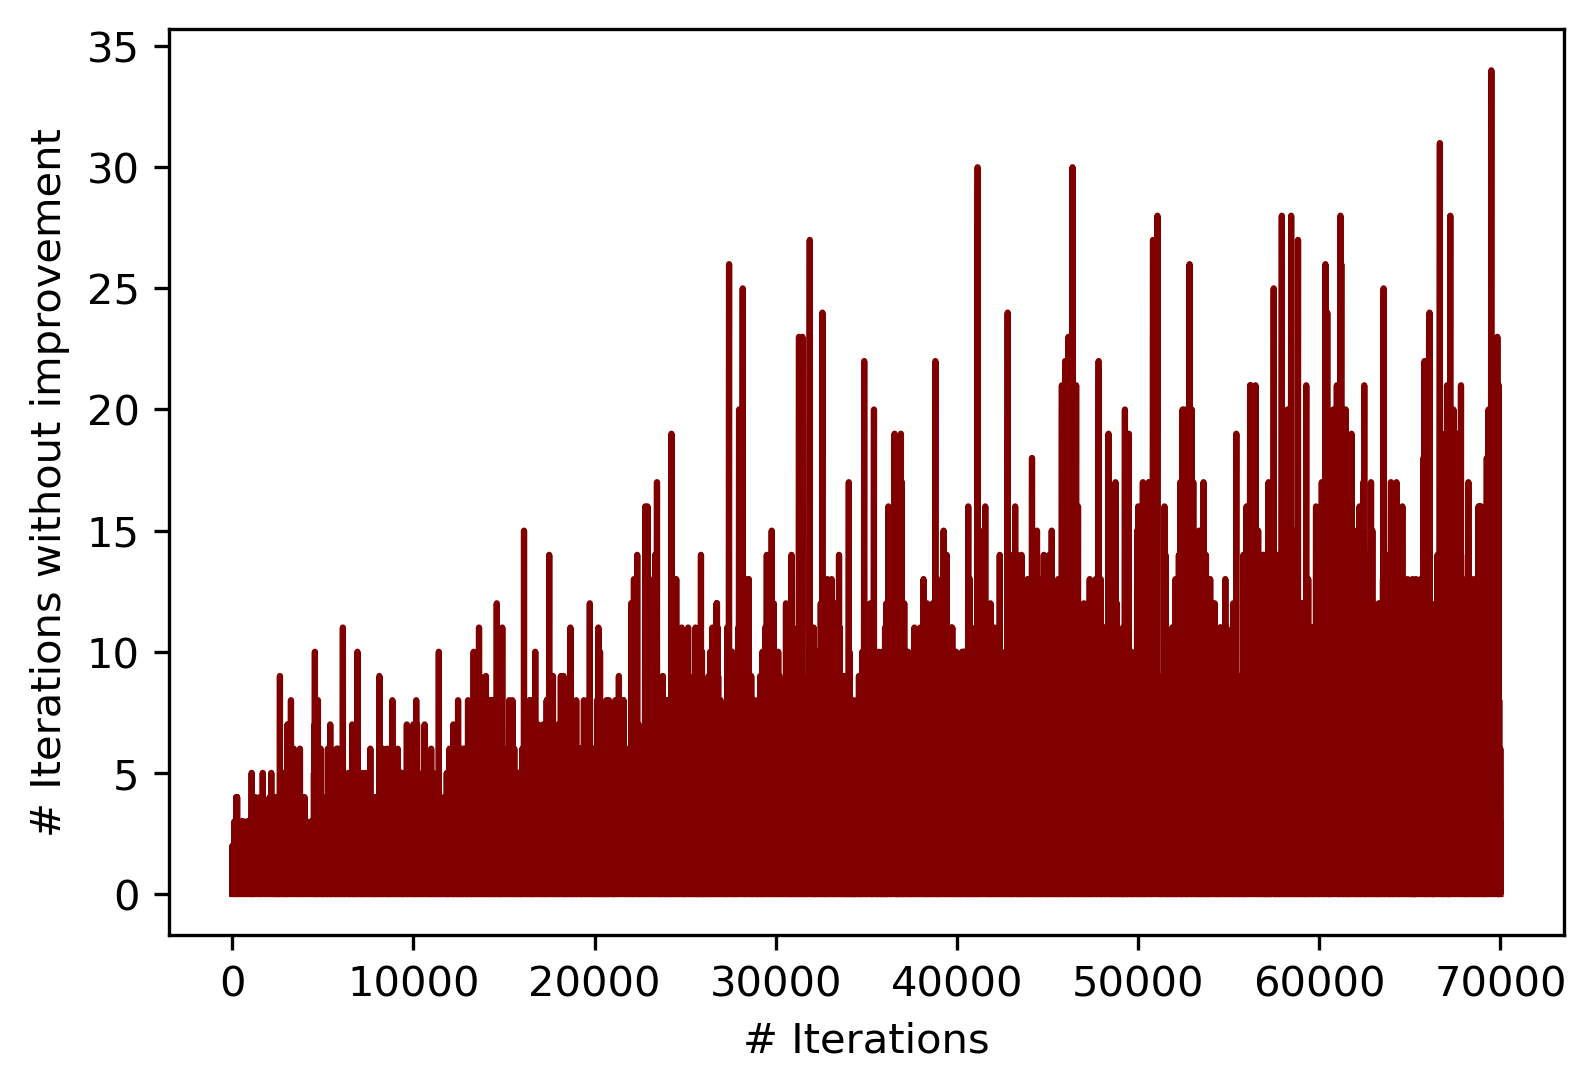

In [8]:
plt.figure(dpi=300)
plt.plot(final_data['Iterations'], final_data['Stopping Iterations'], color='maroon')
plt.xlabel('# Iterations')
plt.ylabel('# Iterations without improvement')
# plt.xlim(36000,)
# plt.savefig(data_dir+'Plots/stopping_iterations_Evolution_test.png', 
#             bbox_inches='tight', facecolor='white')
plt.show()

In [269]:
init_mask = np.loadtxt("Optimizations/GD_ms_64-ff_5-seed_1687817314/Initial_mask.txt")
final_mask = np.loadtxt("Optimizations/GD_ms_64-ff_5-seed_1687817314/Final_mask.txt")

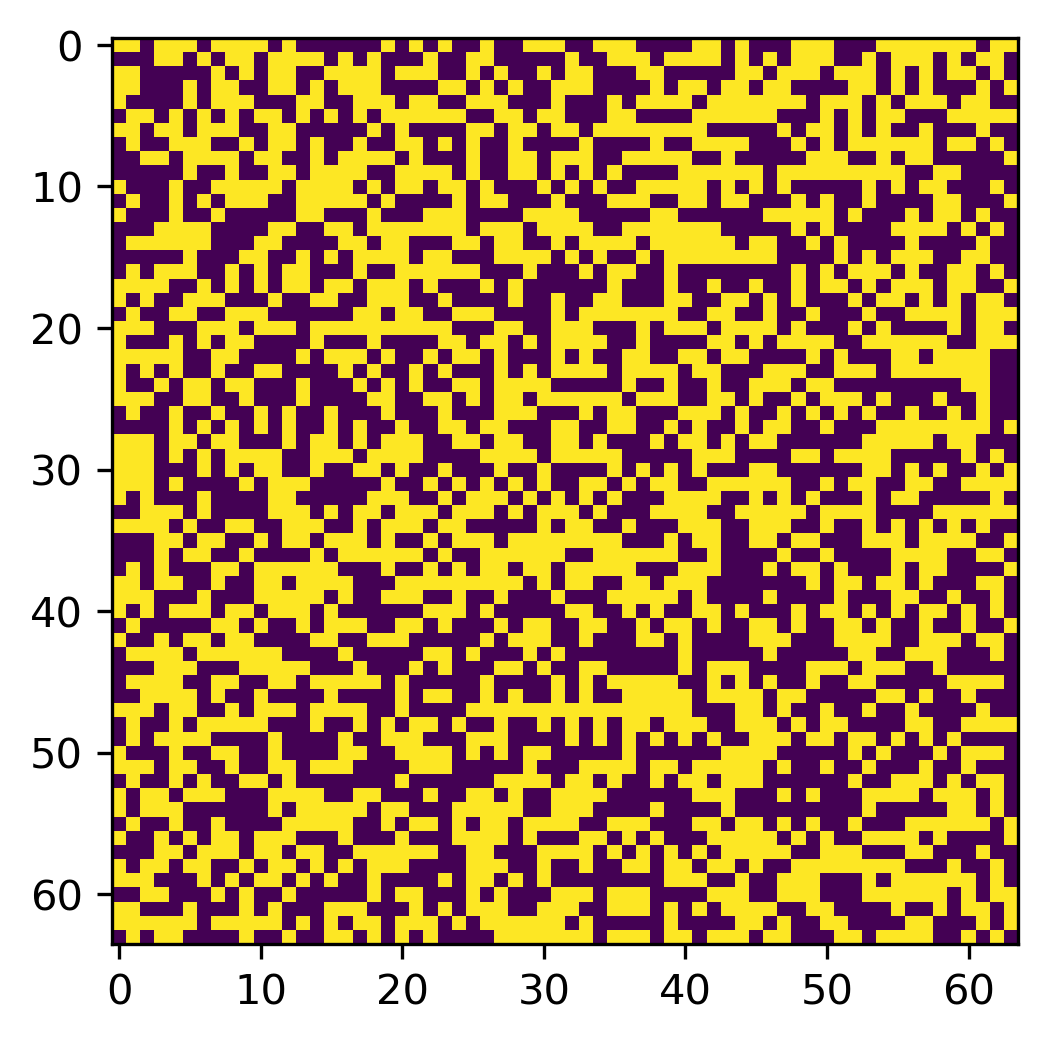

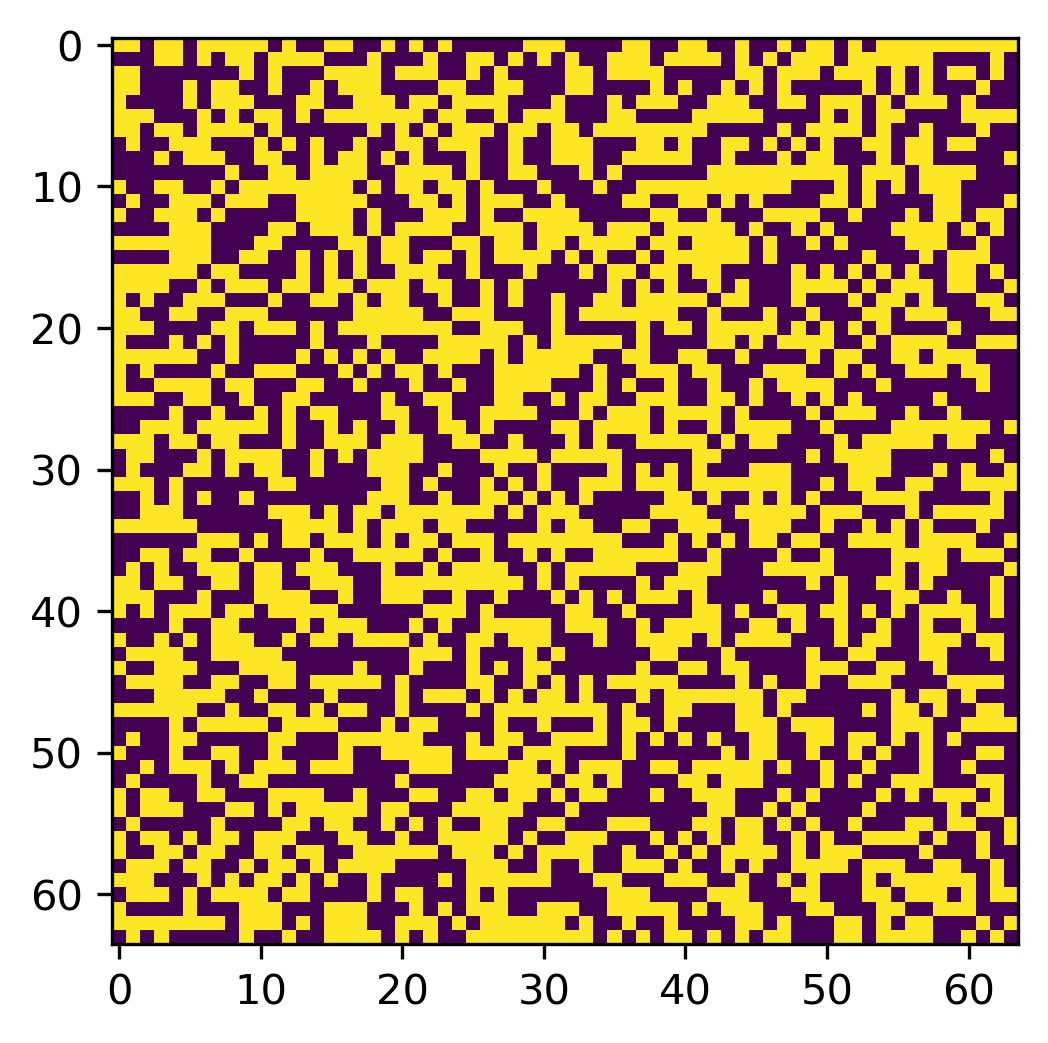

In [270]:
plt.figure(dpi=300)
plt.imshow(init_mask)
plt.show()

plt.figure(dpi=300)
plt.imshow(final_mask)
plt.show()

In [18]:
from optimize import OptimizerClass

In [19]:
optim = OptimizerClass()

Saved Initial aperture mask image


In [20]:
optim.CalculateMetric()

36.244010608065466

In [27]:
optim.mask = np.loadtxt(data_dir+'Initial_mask.txt')

In [25]:
optim.CalculateMetric()

36.47645214386103

In [28]:
optim.CalculateMetric()

37.25037944370602

In [29]:
36.47645214386103/37.25037944370602

0.9792236398285669

In [36]:
37.25037944370602*min(final_data['Metrics'])

20.055328176829622

In [38]:
36.47645214386103*0.5479722770463782

19.988084539844774

In [3]:
def hole_size_checking(mask, limit=20, plot=False):
    # Returns True if all holes are less than the limit and False otherwise
    # -------- Hole Detection ------------
    row_holes, holes = [], []
    for m, row in enumerate(mask):
        temp_holes = []
        for n, col in enumerate(row):
            if col == 1:
                temp_holes.append(n)
        holes.append(temp_holes)

    # -------- Groups Assignment ----------
    groups, change_groups, gn = [], [[],[]], 0
    for j, r in enumerate(holes):
        temp_groups = []
        for k, c in enumerate(r):
            if k != 0:
                if c-1 != holes[j][k-1]:
                    gn += 1
            temp_groups.append(gn)

        if j != 0:
            sub_groups = [[i for i, x in enumerate(temp_groups) if x == g] for g in set(temp_groups)]

            for sub in sub_groups:
                group_matched = False
                for s in sub:
                    if holes[j][s] in holes[j-1]:
                        if group_matched:
                            if len(change_groups[0]) != 0:
                                if new_sub_group in change_groups[0]:
                                    change_groups[1].append(change_groups[1][change_groups[0].index(new_sub_group)])
                                else:
                                    change_groups[1].append(new_sub_group)
                            else:
                                change_groups[1].append(new_sub_group)
                            change_groups[0].append(groups[j-1][holes[j-1].index(holes[j][s])])
                        else:
                            group_matched = True
                            new_sub_group = groups[j-1][holes[j-1].index(holes[j][s])]
                if group_matched:
                    for s in sub:
                        temp_groups[s] = new_sub_group
        gn += 1
        groups.append(temp_groups)

    change_groups = [[old, new] for new, old in sorted(zip(change_groups[1], change_groups[0]))]
    changed = [[], []]
    for i, change_pair in enumerate(change_groups):
        change_from, change_to = change_pair[0], change_pair[1]
        if change_from == change_to:
            continue
        for m, row in enumerate(groups):
            if i != 0:
                if change_to in changed[0]:
                    change_to = changed[1][changed[0].index(change_to)]
                elif change_from in changed[0] and change_to not in changed[1]:
                    change_to_old = change_to
                    change_to = changed[1][changed[0].index(change_from)]
                    change_from = change_to_old
                
                changed[0].append(change_from)
                changed[1].append(change_to)
            if change_from in row:
                change_indices = [j for j, x in enumerate(row) if x == change_from]
                for c in change_indices:
                    groups[m][c] = change_to
    unique_groups = set(sum(groups, []))
    
    if plot:
        mask_change = np.copy(mask-2)
        for m, row in enumerate(holes):
            for n, col in enumerate(row):
                mask_change[m,col] = groups[m][n]
                
        plt.figure(dpi=200)
        cmap, norm = from_levels_and_colors(sorted([-2]+list(unique_groups)+[list(unique_groups)[-1]+1]),
                                       ['black']+distinctipy.get_colors(len(unique_groups)))
        plt.imshow(mask_change, cmap=cmap, norm=norm)
        plt.show()
    else:
        group_counts = [list(unique_groups),
                [sum([sum([1 for i, x in enumerate(row) if x == g]) for row in groups]) for g in unique_groups]]

        alarm = [i for i, x in enumerate(group_counts[1]) if x >= limit]

        return not alarm

In [5]:
test_mask = np.loadtxt('Optimizations/GD_ms_35-ff_5-mag_2.0-seed_3/Initial_mask.txt')

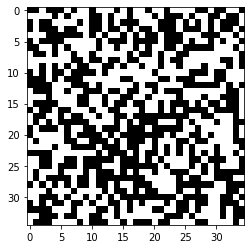

In [23]:
plt.imshow(test_mask, cmap='binary_r')

In [39]:
test_mask_new = np.copy(test_mask-1)

In [40]:
test_mask_new

array([[-1., -1.,  0., ...,  0.,  0., -1.],
       [ 0.,  0.,  0., ..., -1., -1.,  0.],
       [-1.,  0., -1., ..., -1., -1.,  0.],
       ...,
       [-1., -1., -1., ...,  0., -1., -1.],
       [ 0.,  0., -1., ...,  0., -1., -1.],
       [ 0., -1., -1., ...,  0., -1.,  0.]])

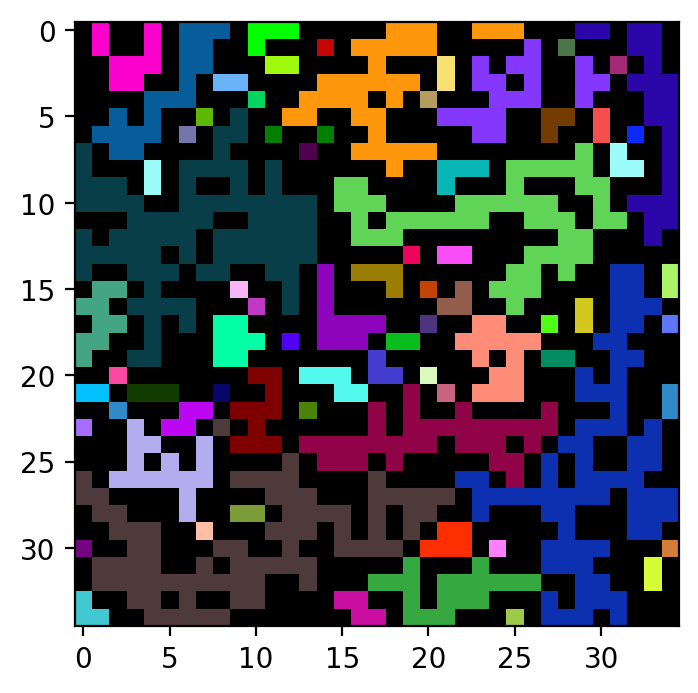

In [263]:
mask_size = 35
fill_frac = 0.5
mask = np.ones(mask_size**2)
num_fill = math.ceil(fill_frac * (mask_size**2))

mask[np.random.choice(mask.size, num_fill, replace=False)] = 0

mask = mask.reshape(mask_size, mask_size)

size_check = hole_size_checking(mask, plot=True)

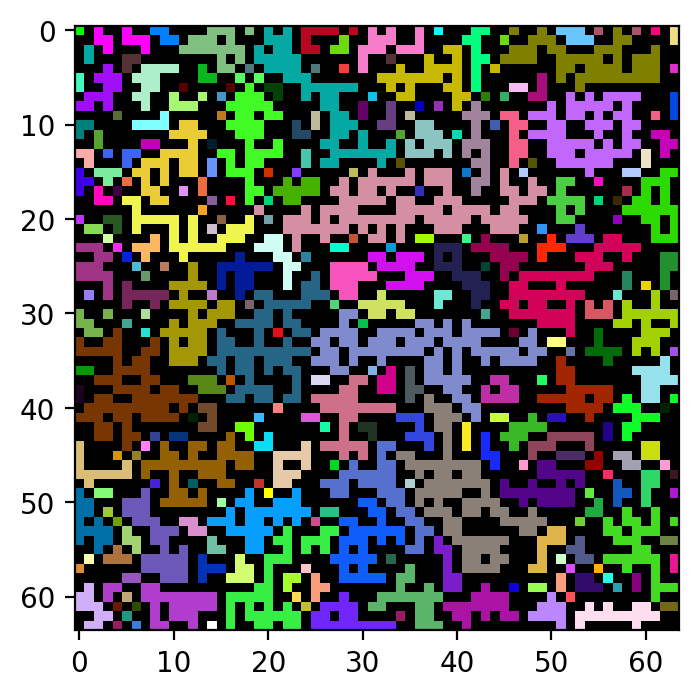

In [272]:
size_check = hole_size_checking(np.loadtxt('Optimizations/GD_ms_64-ff_5-mag_2-seed_1/Initial_mask.txt'), plot=True)

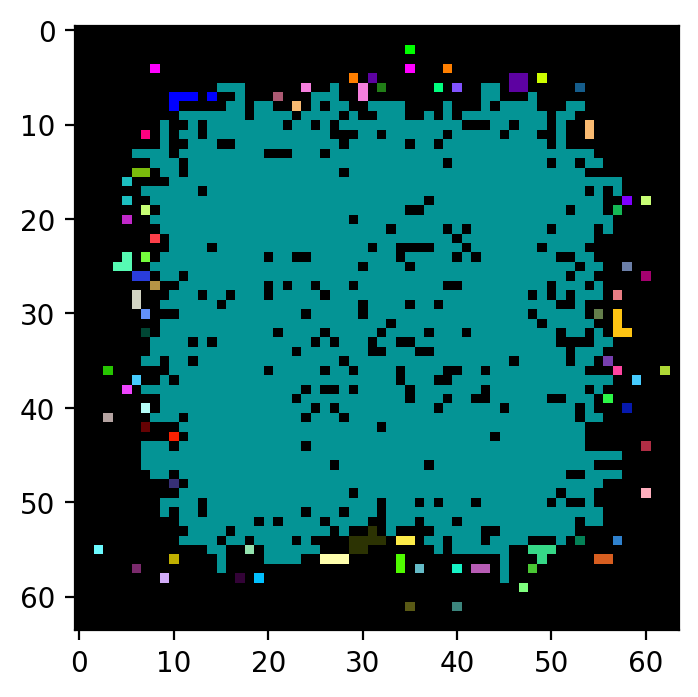

In [265]:
size_check = hole_size_checking(np.loadtxt('Optimizations/GD_ms_64-ff_5-mag_2-seed_1/INCOMPLETE_min_mask.txt'), plot=True)

In [299]:
0.08*((45**2)/2)

81.0

In [286]:
0.04*((64**2)/2)

81.92

It took 2 iterations and 0.21389102935791016 seconds to find a mask.


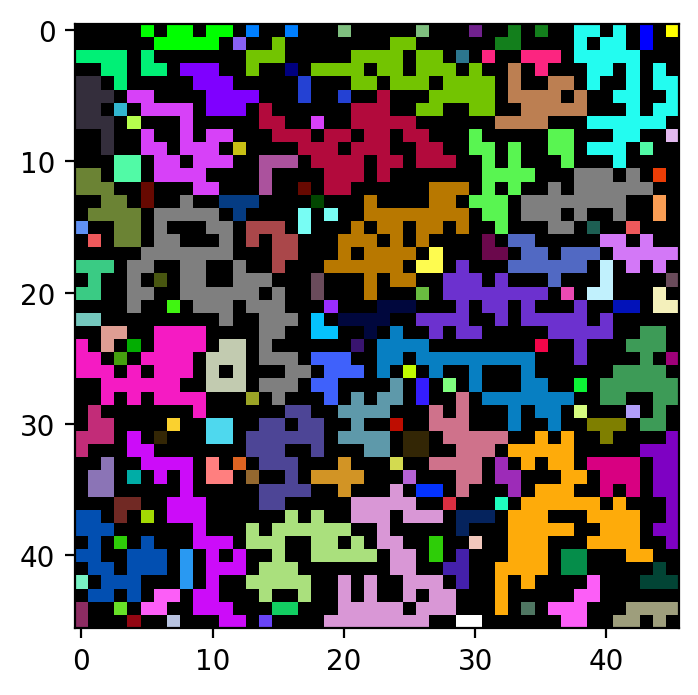

In [303]:
# mask_size = 46
# fill_frac = 0.5

# limit = 80

# hole_checking = True

# st = time.time()
# it = 0
# while hole_checking:
#     it += 1
#     mask = np.ones(mask_size**2)
#     num_fill = math.ceil(fill_frac * (mask_size**2))

#     mask[np.random.choice(mask.size, num_fill, replace=False)] = 0

#     mask = mask.reshape(mask_size, mask_size)
    
#     if hole_size_checking(mask, limit):
#         hole_checking = False
        
# et = time.time()

print('It took {} iterations and {} seconds to find a mask.'.format(it, et-st))
hole_size_checking(mask, plot=True)

In [277]:
from optimize import *

In [278]:
op = OptimizerClass()

Saved Initial aperture mask image


In [279]:
op.mask = mask

In [280]:
op.VisualizeMask(op.mask, 'test')

Saved test aperture mask image


In [218]:
%timeit hole_size_checking(mask, 10)

33.5 ms ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [196]:
[[old, new] for old, new in sorted(zip(change_groups[0], change_groups[1]))]

[[0, 0], [0, 0], [0, 15], [0, 15], [15, 15], [15, 15], [24, 0]]

In [137]:
sorted([-100]+list(unique_groups)+[list(unique_groups)[-1]+1])

[-100,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 14,
 16,
 20,
 22,
 23,
 26,
 27,
 30,
 32,
 37,
 39,
 41,
 43,
 47,
 53,
 57,
 58,
 64,
 69,
 71,
 78,
 79,
 85,
 86,
 87,
 91,
 93,
 101,
 103,
 104,
 110,
 115,
 117,
 121,
 122,
 134,
 136,
 138,
 149,
 152,
 156,
 157,
 160,
 164,
 165,
 168,
 171,
 174,
 176,
 183,
 202,
 203,
 206,
 208,
 215,
 216,
 217,
 221,
 222,
 223,
 224,
 225]

In [121]:
unique_groups

{0, 2, 6, 8, 11, 16, 20, 25, 26, 28, 30}

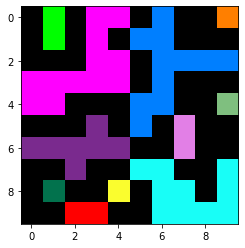

In [101]:
plt.imshow(mask_change, cmap=cmap, norm=norm)

In [56]:
test_mask_new = np.copy(test_mask-100)
for m, row in enumerate(test_holes):
    for n, col in enumerate(row):
        test_mask_new[m,col] = test_hg[m][n]

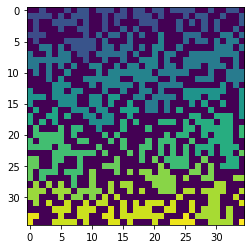

In [57]:
plt.imshow(test_mask_new)

In [48]:
from distinctipy import distinctipy

In [52]:
colors = distinctipy.get_colors(31)

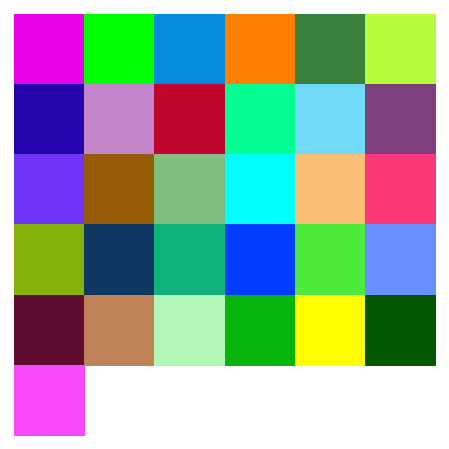

In [53]:
distinctipy.color_swatch(colors)

In [125]:
def CreateMask(self):
        """
        Creation of the first mask for the "optimization" process
        """
        hole_checking = True
        while hole_checking:
            if not self.sectioning:
                mask = np.ones(self.mask_size**2)
                num_fill = math.ceil(self.fill_frac * (self.mask_size**2))

                mask[np.random.choice(mask.size, num_fill, replace=False)] = 0

                mask = mask.reshape(self.mask_size, self.mask_size)
            else:
                section_size = self.sample_size - self.section_offset
                num_fill = math.ceil(self.fill_frac * (section_size**2))
                
                group_indices = []
                for col_section in range(math.floor(self.mask_size/section_size)):
#                     print('row', row_section)
                    temp_column = np.ones(section_size**2)
                    temp_column[np.random.choice(temp_column.size, num_fill, replace=False)] = 0
                    temp_column = temp_column.reshape(section_size, section_size)
                    group_indices.append([[0, col_section*section_size],
                                              [section_size, (col_section+1)*section_size]])
                    for row_section in range(math.floor(self.mask_size/section_size)-1):
#                         print('col', col_section)
                        temp_mask = np.ones(section_size**2)
                        temp_mask[np.random.choice(temp_mask.size, num_fill, replace=False)] = 0
                        temp_mask = temp_mask.reshape(section_size, section_size)
                        temp_column = np.concatenate((temp_column, temp_mask), axis=0)
                        group_indices.append([[(row_section+1)*section_size, (col_section)*section_size],
                                              [(row_section+2)*section_size, (col_section+1)*section_size]])
                    if col_section == 0:
                        mask = np.copy(temp_column)
                    else:
                        mask = np.concatenate((mask, temp_column), axis=1)
                
                if self.mask_size % section_size != 0:
                    fix_column = np.ones((self.mask_size%section_size)*(mask.shape[0]))
                    col_fix_fill = math.floor(self.fill_frac * (fix_column.size))
                    fix_column[np.random.choice(fix_column.size, col_fix_fill, replace=False)] = 0
                    fix_column = fix_column.reshape((mask.shape[0]), (self.mask_size%section_size))
                    
                    mask = np.concatenate((mask, fix_column), axis=1)
                    group_indices.append([[0, mask.shape[0]], list(mask.shape)])
                    
                    fix_row = np.ones((self.mask_size%section_size)*(mask.shape[1]))
                    row_fix_fill = math.floor(self.fill_frac * (fix_row.size))
                    fix_row[np.random.choice(fix_row.size, row_fix_fill, replace=False)] = 0
                    fix_row = fix_row.reshape((self.mask_size%section_size), (mask.shape[1]))
                    
                    sms = mask.shape[0]
                    mask = np.concatenate((mask, fix_row), axis=0)
                    group_indices.append([[sms, 0], list(mask.shape)])
                
            if not self.balanced:
                hole_checking = False
            else:
                if self.hole_size_checking(mask):
                    hole_checking = False

        np.savetxt(self.data_dir+'Initial_mask.txt', mask, fmt='%i')

        self.mask = mask.copy()

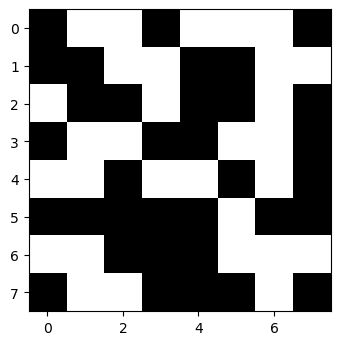

In [129]:
mask, gi = CreateMask(8, 5)

plt.figure(dpi=100)
plt.imshow(mask, cmap='binary_r')
plt.show()

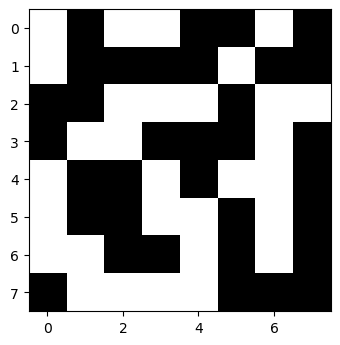

Chosen group:  5


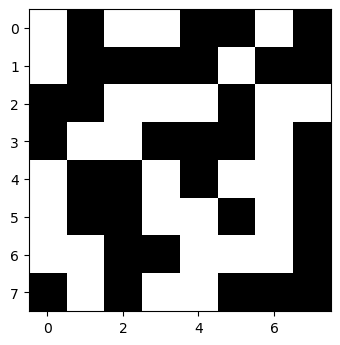

In [170]:
mask, gi = CreateMask(8, 5)
plt.figure(dpi=100)
plt.imshow(mask, cmap='binary_r')
plt.show()
group_pick = np.random.choice(list(np.arange(len(gi))))
print("Chosen group: ", group_pick)
# group_pick = 5
section_size = 3
chosen_group = mask[gi[group_pick][0][0]:gi[group_pick][1][0], gi[group_pick][0][1]:gi[group_pick][1][1]]
original_shape = chosen_group.shape
chosen_group = chosen_group.reshape(chosen_group.size, )

rand_pop   = np.random.choice(np.where(chosen_group > 0)[0]) # Random populated position
rand_empty = np.random.choice(np.where(chosen_group < 1)[0]) # Random empty position
chosen_group[rand_pop] = 0
chosen_group[rand_empty] = 1

chosen_group = chosen_group.reshape(original_shape)

mask[gi[group_pick][0][0]:gi[group_pick][1][0], gi[group_pick][0][1]:gi[group_pick][1][1]] = chosen_group

plt.figure(dpi=100)
plt.imshow(mask, cmap='binary_r')
plt.show()

In [156]:
chosen_group.reshape(original_shape)

array([[0., 1., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 1., 1., 1.]])

In [128]:
group_pick = 0
np.where(mask[gi[group_pick][0][0]:gi[group_pick][0][0]])

array([[1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 1., 1.]])

In [2]:
test_mask_init = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_3-seed_300-hl_80/Initial_mask.txt')
test_mask_fin = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_3-seed_300-hl_80/final_mask.txt')

In [5]:
import scipy.signal as signal

In [4]:
stopping_percent = 0.95
transmission = 1 - stopping_percent

In [6]:
sample_size = 9

In [7]:
sens_mask = np.copy(test_mask_init)
sens_mask[sens_mask == 0] = transmission

In [8]:
sens_sample = np.ones((sample_size, sample_size))

In [9]:
sens_sample

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

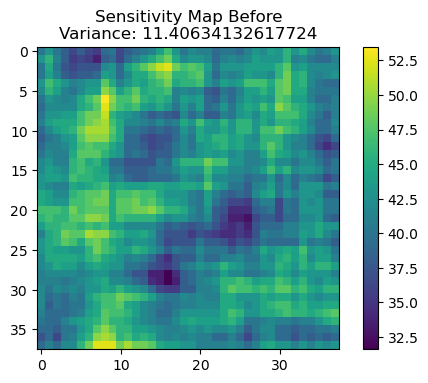

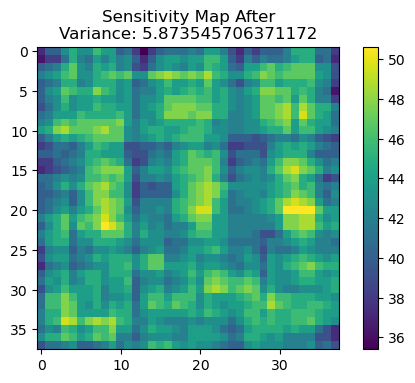

In [14]:
sens_mask = np.copy(test_mask_init)
sens_mask[sens_mask == 0] = transmission

trans_init = signal.correlate2d(sens_mask, sens_sample, mode='valid')

sens_mask = np.copy(test_mask_fin)
sens_mask[sens_mask == 0] = transmission
trans_fin = signal.correlate2d(sens_mask, sens_sample, mode='valid')

plt.figure(dpi=100, facecolor='white')
plt.imshow(trans_init)
plt.title('Sensitivity Map Before\nVariance: {}'.format(np.var(trans_init)))
plt.colorbar()
plt.show()

plt.figure(dpi=100, facecolor='white')
plt.imshow(trans_fin)
plt.title('Sensitivity Map After\nVariance: {}'.format(np.var(trans_fin)))
plt.colorbar()
plt.show()

In [11]:
np.var(trans_init)

11.40634132617724

In [12]:
np.var(trans_fin)

5.873545706371172

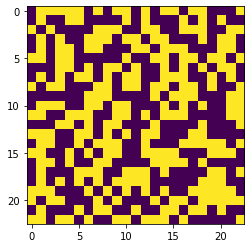

In [35]:
plt.imshow(test_mask_init)

In [15]:
def CalculateMetric(mask):
    # Cross correlation metric
    mask_size = 46
    fill_frac = 0.5
    sample_size = math.floor(37/4)
    corr_size = signal.correlate2d(mask, mask[0:sample_size, 0:sample_size], mode='valid').shape[0]
    F_matrix = np.array([(signal.correlate2d(mask, mask[m:m+sample_size, n:n+sample_size], mode='valid')/(corr_size**2)).reshape(corr_size**2, ) for m in range(0, mask_size-sample_size+1) for n in range(0, mask_size-sample_size+1)])
    Q1 = (1/sample_size)*np.sum((np.diag(F_matrix)-fill_frac)**4)
    np.fill_diagonal(F_matrix, fill_frac**2)
    Q2 = (1/(sample_size**2-sample_size))*np.sum((F_matrix-fill_frac**2)**4)
    
    sens_sample = np.ones((sample_size, sample_size))
    sens_mask = np.copy(mask)
    sens_mask[sens_mask == 0] = 0.05
    sensitivity_matrix = signal.correlate2d(sens_mask, sens_sample, mode='valid')
    return Q1 + Q2, np.var(sensitivity_matrix)

In [16]:
test_mask = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_4.0-seed_200-hl_80-cw_1.0-sw_1.0/final_mask.txt')

In [17]:
CalculateMetric(test_mask)

(94.34994295512395, 2.0805626731301916)

In [18]:
test_mask = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_4.0-seed_200-hl_80-cw_1.0-sw_2.0/final_mask.txt')

In [19]:
CalculateMetric(test_mask)

(96.06146147709264, 0.991206717451522)

In [20]:
test_mask = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_4.0-seed_200-hl_80-cw_1-sw_0.0/INCOMPLETE_min_mask.txt')

In [21]:
CalculateMetric(test_mask)

(89.44742360066118, 26.73342451523547)

In [22]:
test_mask = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_4.0-seed_200-hl_80-cw_2.0-sw_1.0/INCOMPLETE_min_mask.txt')

In [23]:
CalculateMetric(test_mask)

(92.60859353018657, 4.004353791551242)

In [24]:
test_mask = np.loadtxt('Optimizations/GD_ms_46-ff_5-mag_4.0-seed_200-hl_80-cw_0.0-sw_1/final_mask.txt')

In [25]:
CalculateMetric(test_mask)

(98.15174508055554, 0.5689452042936279)

In [36]:
test = OptimizerClass(fill_frac = 0.35, magnification = 4, hole_limit=500)

Saved Initial aperture mask image


In [12]:
test.fill_frac = 0.3
test.magnification = 4
test.hole_limit = 160